# Lab 3 - FitBit Prediction

In [321]:
import numpy as np
import pandas as pd

november = pd.read_csv("/Users/jaredmcmullen/Desktop/GSB-S545/data/November Sleep Data - Sheet1.csv")
december = pd.read_csv("/Users/jaredmcmullen/Desktop/GSB-S545/data/December Sleep data - Sheet1.csv")
january = pd.read_csv("/Users/jaredmcmullen/Desktop/GSB-S545/data/January sleep data - Sheet1.csv")
february = pd.read_csv("/Users/jaredmcmullen/Desktop/GSB-S545/data/February sleep data - Sheet1 (1).csv")
january

,JANUARY,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE UNDER RESTING,SLEEP TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saturday,1/1/22,63.0,4:13:00,0.15,0.18,0.00,06:10am - 10:52am
2,Sunday,1/2/22,90.0,8:09:00,0.22,0.18,0.92,02:51am - 11:59am
3,Monday,1/3/22,83.0,7:27:00,0.16,0.13,0.96,11:27pm - 08:28am
4,Tuesday,1/4/22,90.0,7:25:00,0.19,0.21,0.99,10:52pm - 07:19am
5,Wednesday,1/5/22,81.0,7:10:00,0.18,0.15,0.89,10:42pm - 06:57am
6,Thursday,1/6/22,82.0,6:46:00,0.14,0.16,0.96,11:59pm - 07:53am
7,Friday,1/7/22,84.0,6:48:00,0.19,0.21,0.96,10:10pm - 5:58am
8,Saturday,1/8/22,83.0,7:37:00,0.12,0.17,0.98,11:04pm - 8:05am
9,Sunday,1/9/22,87.0,7:47:00,0.20,0.12,0.98,11:13pm - 8:06am


In [359]:
from datetime import datetime
#Turn off warnings
import warnings
warnings.filterwarnings("ignore")

#Combine the datasets
combined_stage1 = pd.concat([november, december.rename(columns={'DECEMBER':'NOVEMBER'})], ignore_index=True)
combined_stage2 = pd.concat([combined_stage1, january.rename(columns={'JANUARY':'NOVEMBER'}).rename(columns={"HEART RATE UNDER RESTING" : "HEART RATE BELOW RESTING"})], ignore_index=True)
combined_stage3 = pd.concat([combined_stage2, february.rename(columns={'FEBEUARY':'NOVEMBER'}).rename(columns={"SLEEP SQORE" : "SLEEP SCORE"})], ignore_index=True)

#Remove first row
remove_data = combined_stage3[1:123]

#Rename month column
remove_data.rename(columns = {"NOVEMBER": "DAYOFWEEK"},inplace = True)

#Convert hours of sleep to minutes
remove_data['HOURS OF SLEEP'] = pd.to_datetime(remove_data['HOURS OF SLEEP'], format = '%H:%M:%S')
remove_data['HOURS OF SLEEP'] = remove_data['HOURS OF SLEEP'].dt.hour * 60 + remove_data['HOURS OF SLEEP'].dt.minute

#convert REM/DEEP scores to minutes
remove_data["REM SLEEP MINUTES"] = (remove_data['REM SLEEP'] * remove_data['HOURS OF SLEEP'])
remove_data["DEEP SLEEP MINUTES"] = (remove_data['DEEP SLEEP'] * remove_data['HOURS OF SLEEP'])

#Drop na values
final_data = remove_data.dropna(how='all')

#Extract Bed/rise times
final_data["SLEEP TIME"] = final_data["SLEEP TIME"].str.replace("[pma]", "").str.replace("-", "")
final_data["BED TIME"] = pd.to_datetime(final_data["SLEEP TIME"].str.split(" ").str[0], format = '%H:%M').dt.time
final_data["RISE TIME"] = pd.to_datetime(final_data["SLEEP TIME"].str.split(" ").str[2], format = '%H:%M').dt.time

#Set up tieres for sleeping times
#final_data['EARLY TIME'] = pd.to_datetime(["10:00" for x in range(len(final_data.index))], format = '%H:%M').time
final_data['EARLY TIME'] = pd.to_datetime(["11:00" for x in range(len(final_data.index))], format = '%H:%M').time
final_data['LATE TIME'] = pd.to_datetime(["11:45" for x in range(len(final_data.index))], format = '%H:%M').time

#Compare times to make new variables
final_data['EARLY BED'] = np.where((final_data["BED TIME"] <= final_data['EARLY TIME']), 1, 0)
#final_data['MEDIUM BED'] = np.where((final_data["BED TIME"] > final_data['EARLY TIME'])  & (final_data["BED TIME"] <= final_data['MEDIUM TIME']), 1, 0)
final_data['LATE BED'] = np.where((final_data["BED TIME"] > final_data['LATE TIME']), 1, 0)

#Get Dummy variables for days of the week
final_data = pd.get_dummies(final_data, columns=['DAYOFWEEK'])

#Return the final dataset
final_data

,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,REM SLEEP MINUTES,DEEP SLEEP MINUTES,BED TIME,RISE TIME,EARLY TIME,LATE TIME,EARLY BED,LATE BED,DAYOFWEEK_Friday,DAYOFWEEK_Monday,DAYOFWEEK_Saturday,DAYOFWEEK_Sunday,DAYOFWEEK_Thursday,DAYOFWEEK_Tuesday,DAYOFWEEK_Wednesday
1,11/1/21,88.0,486.0,0.20,0.13,0.84,10:41 7:54,97.20,63.18,10:41:00,07:54:00,11:00:00,11:45:00,1,0,0,1,0,0,0,0,0
2,11/2/21,83.0,477.0,0.12,0.18,0.90,10:40 7:55,57.24,85.86,10:40:00,07:55:00,11:00:00,11:45:00,1,0,0,0,0,0,0,1,0
3,11/3/21,81.0,426.0,0.13,0.22,0.93,11:03 7:16,55.38,93.72,11:03:00,07:16:00,11:00:00,11:45:00,0,0,0,0,0,0,0,0,1
4,11/4/21,86.0,424.0,0.19,0.17,0.97,10:55 6:56,80.56,72.08,10:55:00,06:56:00,11:00:00,11:45:00,1,0,0,0,0,0,1,0,0
5,11/5/21,81.0,564.0,0.17,0.15,0.66,10:14 9:01,95.88,84.60,10:14:00,09:01:00,11:00:00,11:45:00,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2/24/22,84.0,438.0,0.19,0.19,0.96,10:23 6:43,83.22,83.22,10:23:00,06:43:00,11:00:00,11:45:00,1,0,0,0,0,0,1,0,0
119,2/25/22,90.0,466.0,0.20,0.21,0.98,10:28 7:15,93.20,97.86,10:28:00,07:15:00,11:00:00,11:45:00,1,0,1,0,0,0,0,0,0
120,2/26/22,82.0,482.0,0.16,0.16,0.57,11:05 8:10,77.12,77.12,11:05:00,08:10:00,11:00:00,11:45:00,0,0,0,0,1,0,0,0,0
121,2/27/22,85.0,534.0,0.18,0.17,0.81,9:59 8:11,96.12,90.78,09:59:00,08:11:00,11:00:00,11:45:00,1,0,0,0,0,1,0,0,0


In [360]:
y = final_data['SLEEP SCORE'].values
del final_data['SLEEP SCORE']
#X = final_data[["HOURS OF SLEEP", "HEART RATE BELOW RESTING", "REM SLEEP MINUTES", "DEEP SLEEP MINUTES", "EARLY BED", "MEDIUM BED", "LATE BED", "DAYOFWEEK_Friday", "DAYOFWEEK_Monday","DAYOFWEEK_Tuesday", "DAYOFWEEK_Wednesday", "DAYOFWEEK_Thursday","DAYOFWEEK_Saturday", "DAYOFWEEK_Sunday"]].values
#X = final_data[["HOURS OF SLEEP", "HEART RATE BELOW RESTING", "REM SLEEP MINUTES", "DEEP SLEEP MINUTES","DAYOFWEEK_Friday", "DAYOFWEEK_Monday","DAYOFWEEK_Tuesday", "DAYOFWEEK_Wednesday", "DAYOFWEEK_Thursday","DAYOFWEEK_Saturday", "DAYOFWEEK_Sunday"]].values
X = final_data[["HOURS OF SLEEP", "HEART RATE BELOW RESTING", "REM SLEEP MINUTES", "DEEP SLEEP MINUTES","EARLY BED", "LATE BED", "DAYOFWEEK_Friday", "DAYOFWEEK_Saturday", "DAYOFWEEK_Sunday", "DAYOFWEEK_Monday"]].values

X

array([[486.  ,   0.84,  97.2 , ...,   0.  ,   0.  ,   1.  ],
       [477.  ,   0.9 ,  57.24, ...,   0.  ,   0.  ,   0.  ],
       [426.  ,   0.93,  55.38, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [482.  ,   0.57,  77.12, ...,   1.  ,   0.  ,   0.  ],
       [534.  ,   0.81,  96.12, ...,   0.  ,   1.  ,   0.  ],
       [477.  ,   0.54,  90.63, ...,   0.  ,   0.  ,   1.  ]])

In [343]:
#Select all the models you want to test
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor

#Define the stacking model used later on
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rf', RandomForestRegressor()))
    level0.append(('svm', SVR()))
    #meta learner model
    level1 = LinearRegression()
    #stacking ensemble
    model = StackingRegressor(estimators = level0, final_estimator = level1, cv =5)
    return model

#Define the models that are going to be iterated through later on 
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    models['svm'] = SVR()
    models['lr_bag'] = BaggingRegressor(base_estimator = LinearRegression())
    models['knn_bag'] = BaggingRegressor(base_estimator = KNeighborsRegressor())
    models['cart_bag'] = BaggingRegressor(base_estimator = DecisionTreeRegressor())
    models['rf_bag'] = BaggingRegressor(base_estimator = RandomForestRegressor())
    models['svm_bag'] = BaggingRegressor(base_estimator = SVR())
    models['stacking'] = get_stacking()
    return models
models = get_models()

In [344]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#Create a function to iterate through different models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.753 (0.131)
>knn 0.413 (0.178)
>cart 0.648 (0.125)
>rf 0.799 (0.089)
>svm 0.103 (0.132)
>lr_bag 0.748 (0.137)
>knn_bag 0.421 (0.197)
>cart_bag 0.763 (0.097)
>rf_bag 0.784 (0.075)
>svm_bag 0.107 (0.130)
>stacking 0.816 (0.098)


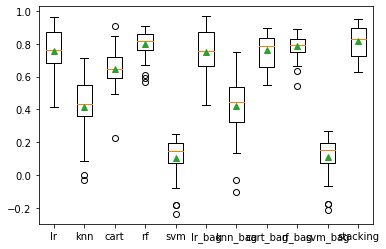

In [345]:
#Turn off warnings
import warnings
warnings.filterwarnings("ignore")

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
#Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

From here we can determine that bagging works better for knn, decision trees, and svm. It does not work better for linear regression or random forests. From here we will re-define the stacking models to account for half bag/half base models to get the best stacking outcome. 

## Final Model

>stacking 0.818 (0.088)


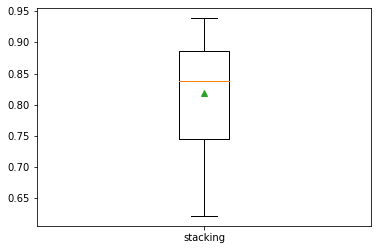

In [362]:
def get_stacking():
    #Define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', BaggingRegressor(base_estimator = KNeighborsRegressor())))
    level0.append(('cart', BaggingRegressor(base_estimator = DecisionTreeRegressor())))
    level0.append(('rf', RandomForestRegressor()))
    level0.append(('svm', BaggingRegressor(base_estimator = SVR())))
    #meta learner model
    level1 = LinearRegression()
    #stacking ensemble
    model = StackingRegressor(estimators = level0, final_estimator = level1, cv =5)
    return model

def get_models():
    models = dict()
    models['stacking'] = get_stacking()
    return models
models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
#Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()